Import Library useful

In [57]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Imputation of missing values
from sklearn.impute import KNNImputer

#Preprocessing scaler, one-hot
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, MinMaxScaler, MaxAbsScaler

#Model
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics and graph
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
%matplotlib inline

Import data and description

In [58]:
#data link https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29\n",
header_column = ["Status of existing checking account",
                "Duration in month",
                "Credit history",
                "Purpose",
                "Credit amount",
                "Savings account/bonds",
                "Present employment since",
                "Installment rate in percentage of disposable income",
                "Personal status and sex",
                "Other debtors / guarantors",
                "Present residence since",
                "Property",
                "Age in years",
                "Other installment plans",
                "Housing",
                "Number of existing credits at this bank",
                "Job",
                "Number of people being liable to provide maintenance for",
                "Telephone",
                "foreign worker",
                "actual classification"]
data = pd.read_csv("D:\Frong\Github\software development\SC348810-Software-Development-and-Project-Management-for-Data-Science-and-Artificial-Intelligence\data\german_data.txt", sep = " ", names = header_column)
df = pd.DataFrame(data = data)

#Check data
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,actual classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

Change object -> category

: Category dtype better than object when you train model.

In [60]:
#Change dtype object -> category
df_cat = df.copy()
for col_name in df_cat.columns:
    if np.dtype(df_cat[col_name]) == "object":
        df_cat[col_name] = df_cat[col_name].astype("category")
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype   
---  ------                                                    --------------  -----   
 0   Status of existing checking account                       1000 non-null   category
 1   Duration in month                                         1000 non-null   int64   
 2   Credit history                                            1000 non-null   category
 3   Purpose                                                   1000 non-null   category
 4   Credit amount                                             1000 non-null   int64   
 5   Savings account/bonds                                     1000 non-null   category
 6   Present employment since                                  1000 non-null   category
 7   Installment rate in percentage of disposable income       1000 non-null   int64   
 8   Personal 

***Actual class 

: 0 -> bad

: 1 -> good

Data management

In [61]:
#When you random value from library, A values will be same point at the different time.
SEED = 0 

#Define target and feature from dataframe.
TARGET = "actual classification"
FEATURES = df_cat.columns.drop(TARGET)

#Select data columns name only dtype 'number'
NUMERICAL = df_cat[FEATURES].select_dtypes('number').columns

#Select data coulumn name only dtype 'category'
CATEGORICAL = pd.Index(np.setdiff1d(FEATURES, NUMERICAL)) # np.setdiff1d(a, b) -> return unique values in a that b value not in a Ex. [1, 2, 3], [3, 4] => [1, 2]

#Change string to float
for column_name in df_cat[CATEGORICAL]:
    df_cat[column_name] = df_cat[column_name].cat.codes

#Change Class 0-> bad, 1-> good
for index, val in enumerate(df_cat["actual classification"]):
    if val == 2:
        df_cat["actual classification"][index] = 0

input = df_cat.drop(columns=TARGET)
target = df_cat[TARGET]

C:\Users\FRONG\AppData\Local\Temp\ipykernel_24452\2126606599.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat["actual classification"][index] = 0


Pipline

In [62]:
#Numerical_pipline
numerical_pipe = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 7, weights = 'uniform')), #Method to solve missing values
    ('scaler', MaxAbsScaler()) #Change scale on data
])

categorical_pipe = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 7, weights = 'uniform')),
    ('encoder', OneHotEncoder())  #Extract data to one-hot to each columns
])

#numerical and cateforical add to preprocessor
preprocessor = ColumnTransformer(
    transformers=[
    ('num', numerical_pipe, NUMERICAL),
    ('cat', categorical_pipe, CATEGORICAL)
])

In [63]:
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=.25, random_state=SEED, 
                                    stratify=df_cat[TARGET]) #Dividing data to train and test set

In [64]:
target_names = ['bad', 'good']

Extreme Gradient Boosting

In [65]:
#Create Pipline of model
XGB_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBClassifier())
])

#Train model
XGB_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=7)),
                                                                  ('scaler',
                                                                   MaxAbsScaler())]),
                                                  Index(['Duration in month', 'Credit amount',
       'Installment rate in percentage of disposable income',
       'Present residence since', 'Age in years',
       'Number of existing credits at this bank',
       'Number of people being liable to provide m...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))])

In [66]:
#Predictation of model to test dataset and measure
y_pred = XGB_pipeline.predict(X_test)
accuracy = XGB_pipeline.score(X_test, y_test)

print("accuracy: ",accuracy)
print("f1_score: ",f1_score(y_test, y_pred, average="weighted"))

accuracy:  0.792
f1_score:  0.7773850377487989


In [67]:
#Check confusiong matrix
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         bad       0.73      0.48      0.58        75
        good       0.81      0.93      0.86       175

    accuracy                           0.79       250
   macro avg       0.77      0.70      0.72       250
weighted avg       0.78      0.79      0.78       250



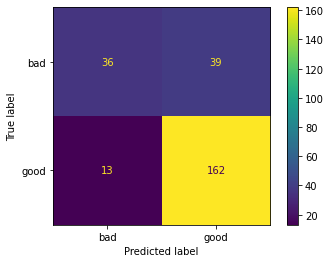

Total test data ->  250


In [68]:
#Visualization confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=target_names)
disp = disp.plot()
plt.show()
print("Total test data -> ", X_test.shape[0])